In [2]:
import open3d as o3d
import numpy as np
import matplotlib.pyplot as plt
import copy

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [3]:
""" Opening and viewing an .obj file """
obj_data = "human_nobg.obj"
mesh = o3d.io.read_triangle_mesh(obj_data)

In [ ]:
# Vertices and triangles of a mesh
print("Vertices")
print(np.asarray(mesh.vertices))
print("triangles")
print(np.asarray(mesh.triangles))
points = np.asarray(mesh.triangles)
vertices = np.asarray(mesh.vertices)

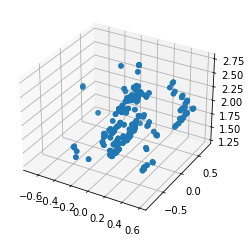

In [68]:
v= vertices[90500:]
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(v[:,0],v[:,1],v[:,2])
plt.show()

Crop Mesh

In [23]:
print("We make a partial mesh of only the first half triangles.")
mesh1 = copy.deepcopy(mesh)
mesh1.triangles = o3d.utility.Vector3iVector(
    np.asarray(mesh1.triangles)[:len(mesh1.triangles) // 2, :])
mesh1.triangle_normals = o3d.utility.Vector3dVector(
    np.asarray(mesh1.triangle_normals)[:len(mesh1.triangle_normals) // 2, :])
print(mesh1.triangles)
o3d.visualization.draw_geometries([mesh1])

We make a partial mesh of only the first half triangles.
std::vector<Eigen::Vector3i> with 74920 elements.
Use numpy.asarray() to access data.


In [6]:
# Check the propertis of 3d object
edge_manifold = mesh.is_edge_manifold(allow_boundary_edges=True)
edge_manifold_boundary = mesh.is_edge_manifold(allow_boundary_edges=False)
vertex_manifold = mesh.is_vertex_manifold()
self_intersecting = mesh.is_self_intersecting()
watertight = mesh.is_watertight()
orientable = mesh.is_orientable()

print(f"  edge_manifold:          {edge_manifold}")
print(f"  edge_manifold_boundary: {edge_manifold_boundary}")
print(f"  vertex_manifold:        {vertex_manifold}")
print(f"  self_intersecting:      {self_intersecting}")
print(f"  watertight:             {watertight}")
print(f"  orientable:             {orientable}")

  edge_manifold:          True
  edge_manifold_boundary: False
  vertex_manifold:        False
  self_intersecting:      True
  watertight:             False
  orientable:             True


Average filter

In [16]:
n_iter = 10
print(f"filter with average with {n_iter} iteration(s)")
mesh_out = mesh.filter_smooth_simple(number_of_iterations=n_iter)
# # computing normal
mesh_out.compute_vertex_normals()

# # Rendering a mesh
o3d.visualization.draw_geometries([mesh])

filter with average with 10 iteration(s)


Laplacian filter

In [20]:
n_iter = 150
print(f"filter with Laplacian with {n_iter} iteration(s)")
mesh_out = mesh.filter_smooth_laplacian(number_of_iterations=n_iter)
# # computing normal
mesh_out.compute_vertex_normals()

# # Rendering a mesh
o3d.visualization.draw_geometries([mesh])

filter with Laplacian with 150 iteration(s)
[Open3D WARNING] GLFW Error: WGL: Failed to make context current: The requested transformation operation is not supported. 


Taubin filter
The problem with the average and Laplacian filter is that they lead to a shrinkage of the triangle mesh. [Taubin1995] showed that the application of two Laplacian filters with different λ parameters can prevent the mesh shrinkage.

In [19]:
n_iter = 100
print(f"filter with Taubin with {n_iter} iteration(s)")
mesh_out = mesh.filter_smooth_taubin(number_of_iterations=n_iter)
# # computing normal
mesh_out.compute_vertex_normals()

# # Rendering a mesh
o3d.visualization.draw_geometries([mesh])

filter with Taubin with 100 iteration(s)
